# Random Walks in Higher-Order Networks


[Run notebook in Google Colab](https://colab.research.google.com/github/pathpy/pathpy/blob/master/doc/tutorial/higher_order_random_walks.ipynb)  
[Download notebook](https://github.com/pathpy/pathpy/raw/master/doc/tutorial/higher_order_random_walks.ipynb)

An interesting application of `pathpy` is the simulation and visualisation of random walk processes in higher-order networks. In the following we demonstrate this in a small toy example.

In [1]:
pip install git+git://github.com/pathpy/pathpy.git

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pathpy as pp
from pprint import pprint
from matplotlib import pyplot as plt

To explain how we can simulate random walks on higher-order networks, we first first create a simple first-order network with four nodes and five edges.

In [2]:
n = pp.Network(directed=False)
n.add_edge('a', 'b', weight=1, uid='a-b')
n.add_edge('b', 'c', weight=1, uid='b-c')
n.add_edge('c', 'a', weight=2, uid='c-a')
n.add_edge('c', 'd', weight=1, uid='c-d')
n.add_edge('d', 'a', weight=1, uid='d-a')

n.plot()

We now create a higher-order network with order two, which corresponds to paths in the first-order network above. We further assign weights to higher-order edges, which means that those paths are taken with different probabilities.

In [3]:
n2 = pp.HigherOrderNetwork()
v1 = pp.HigherOrderNode(n.nodes['a'], n.nodes['b'], uid='a-b')
v2 = pp.HigherOrderNode(n.nodes['b'], n.nodes['c'], uid='b-c')
v3 = pp.HigherOrderNode(n.nodes['c'], n.nodes['a'], uid='c-a')
v4 = pp.HigherOrderNode(n.nodes['c'], n.nodes['d'], uid='c-d')
v5 = pp.HigherOrderNode(n.nodes['d'], n.nodes['a'], uid='d-a')

n2.add_edge(v1, v2, uid='a-b-c', weight=2)
n2.add_edge(v2, v3, uid='b-c-a', weight=1)
n2.add_edge(v2, v4, uid='b-c-d', weight=0.2)
n2.add_edge(v3, v1, uid='c-a-b', weight=4)
n2.add_edge(v4, v5, uid='c-d-a', weight=0.6)
n2.add_edge(v5, v1, uid='d-a-b', weight=0.1)
n2.plot()

The class `RandomWalk`, which we covered in the previous unit, works for any instance of the class `Network`. We can thus simulate and visualise random walks in the same way as before. I.e. to generate, simulate, and visualise a biased random walk on the second-order network above, we simply write:

In [4]:
rw2 = pp.processes.RandomWalk(n2, weight='weight')
data = rw2.run_experiment(steps=10, runs=1)
print(data)

p = rw2.get_path(data)
print(p)

    run_id seed  time node  state
0        0  a-b     0  c-d  False
1        0  a-b     0  d-a  False
2        0  a-b     0  c-a  False
3        0  a-b     0  a-b   True
4        0  a-b     0  b-c  False
5        0  a-b     1  b-c   True
6        0  a-b     1  a-b  False
7        0  a-b     2  c-d   True
8        0  a-b     2  b-c  False
9        0  a-b     3  d-a   True
10       0  a-b     3  c-d  False
11       0  a-b     4  a-b   True
12       0  a-b     4  d-a  False
13       0  a-b     5  b-c   True
14       0  a-b     5  a-b  False
15       0  a-b     6  c-a   True
16       0  a-b     6  b-c  False
17       0  a-b     7  a-b   True
18       0  a-b     7  c-a  False
19       0  a-b     8  b-c   True
20       0  a-b     8  a-b  False
21       0  a-b     9  c-d   True
22       0  a-b     9  b-c  False
23       0  a-b    10  d-a   True
24       0  a-b    10  c-d  False
Uid:		0x132fa3b5cc0
Type:		Path
Directed:	True
Relation:		('a-b', 'b-c', 'c-d', 'd-a', 'a-b', 'b-c', 'c-a', 'a-b', '

In [5]:
rw2.plot(data)

Clearly, since the higher-order network is just another network with special node and edge semantics, everything works just like before: the random walk is visualised in the second-order network, returned paths are sequences of second-order nodes, and the visitation probabilities are actually visitation probabilities of second-order nodes (which correspond to edges in the underlying network).

However, we are mostly not interested in the dynamics of the process in the higher-order node space, but rather wish to project the random walks to the underlying first-order network. This task is facilitated by the class `HigherOrderRandomWalk`, which simulates a random walk process in a higher-order network while projecting the dynamics to a first-order state space. To perform this projection we need to pass the first-order network in addition to the higher-order network to the constructor:

In [6]:
rw2 = pp.processes.HigherOrderRandomWalk(n2, n, weight='weight')
rw2.transition_matrix_pd()

,a-b,b-c,c-a,c-d,d-a
a-b,0.0,1.0,0.000000,0.000000,0.0
b-c,0.0,0.0,0.833333,0.166667,0.0
c-a,1.0,0.0,0.000000,0.000000,0.0
c-d,0.0,0.0,0.000000,0.000000,1.0
d-a,1.0,0.0,0.000000,0.000000,0.0


In [7]:
p = pp.Path('a', 'b', directed=True)
print(p.relations)

('a', 'b')


In [8]:
rw2.stationary_state()

array([0.31578947, 0.31578947, 0.26315789, 0.05263158, 0.05263158])

In [9]:
rw2.first_order_stationary_state()

array([0.31578947, 0.31578947, 0.31578947, 0.05263158])

In [10]:
data = rw2.run_experiment(steps=10, runs=5)
rw2.plot(data)

We now see the trajectory of a random walk in the first-order network, where the random walker follows the dynamics of the underlying higher-order network. Moreover, if we use the functions `get_path` and `get_paths` of `HigherOrderRandomWalk` the walk trajectory is automatically mapped to the first-order node space:

In [11]:
print('First path\n-----')
p = rw2.get_path(data)
pprint(' -> '.join([v for v in p.relations]))
print('Path collection\n-----')
pc = rw2.get_paths(data)
for p in pc:
    pprint(' -> '.join([v for v in p.relations]))

First path
-----
'c -> d -> a -> b -> c -> a -> b -> c -> a -> b -> c -> a'
Path collection
-----
'c -> d -> a -> b -> c -> a -> b -> c -> a -> b -> c -> a'
'd -> a -> b -> c -> a -> b -> c -> a -> b -> c -> a -> b'
'b -> c -> a -> b -> c -> a -> b -> c -> a -> b -> c -> d'
'd -> a -> b -> c -> a -> b -> c -> a -> b -> c -> d -> a'
'a -> b -> c -> a -> b -> c -> a -> b -> c -> d -> a -> b'


Note that you will have to specify higher-order seed node uids if you want to start the random walk in a specific node (because a higher-order node is needed to determine the transition probabilities):

In [12]:
data = rw2.run_experiment(steps=20, runs=['b-c', 'c-d'])
print(data)

    run_id seed  time node  state
0        0  b-c     0  c-d  False
1        0  b-c     0  d-a  False
2        0  b-c     0  c-a  False
3        0  b-c     0  a-b  False
4        0  b-c     0  b-c   True
..     ...  ...   ...  ...    ...
85       1  c-d    18  b-c  False
86       1  c-d    19  a-b   True
87       1  c-d    19  c-a  False
88       1  c-d    20  b-c   True
89       1  c-d    20  a-b  False

[90 rows x 5 columns]


The `HigherOrderRandomWalk` class is derived from the `RandomWalk` class, adding the mapping functionality to the first-order network. If we want to specifically visualise the random walk in the higher-order network, we can do this by explicitly calling the function of the base class (that is agnostic of the fact that the traversed nodes are higher-order nodes):

In [13]:
pp.processes.RandomWalk.plot(rw2, data)

The same holds if we want to return a path consisting of higher-order nodes:

In [15]:
p = pp.processes.RandomWalk.get_path(rw2, data)
print(' -> '.join([v for v in p.relations]))

b-c -> c-a -> a-b -> b-c -> c-a -> a-b -> b-c -> c-d -> d-a -> a-b -> b-c -> c-a -> a-b -> b-c -> c-a -> a-b -> b-c -> c-a -> a-b -> b-c -> c-a


If we use the iterator interface to iterate through the steps of a random walk, you will find that the `current_node` property of the process is still a higher-order node. This is due to the fact that we need this information to determine the next step in the process. Similarly, the visitation frequencies are visitation frequencies of the second-order nodes.

In [16]:
for time, _ in rw2.simulation_run(steps=5, seed='b-c'):
    print('Current node = {0}'.format(rw2.current_node))
    print(rw2.visitation_frequencies)

Current node = c-a
[0.  0.5 0.5 0.  0. ]
Current node = a-b
[0.33333333 0.33333333 0.33333333 0.         0.        ]
Current node = b-c
[0.25 0.5  0.25 0.   0.  ]
Current node = c-a
[0.2 0.4 0.4 0.  0. ]
Current node = a-b
[0.33333333 0.33333333 0.33333333 0.         0.        ]


If you instead want to access the state of the random walk in the first-order node space, you can use the mapping function `first_order_node` to map a higher-order node to the (last visited) first-order node. Moreover, the first-order visitation frequencies of the higher-order random walk are recorded in the property `first_order_visitation_frequencies`. Similarly, you can assess the current distance to the stationary distribution in the first-order state space using the property `first_order_total_variation_distance`.

In [17]:
times = []
tvds = []
for time, _ in rw2.simulation_run(steps=20, seed='b-c'):
    print('Current node = {0}'.format(rw2.first_order_node(rw2.current_node)))
    print(rw2.first_order_visitation_frequencies)
    
    times.append(time)
    tvds.append(rw2.first_order_total_variation_distance)

Current node = a
[0.5 0.  0.5 0. ]
Current node = b
[0.33333333 0.33333333 0.33333333 0.        ]
Current node = c
[0.25 0.25 0.5  0.  ]
Current node = a
[0.4 0.2 0.4 0. ]
Current node = b
[0.33333333 0.33333333 0.33333333 0.        ]
Current node = c
[0.28571429 0.28571429 0.42857143 0.        ]
Current node = d
[0.25  0.25  0.375 0.125]
Current node = a
[0.33333333 0.22222222 0.33333333 0.11111111]
Current node = b
[0.3 0.3 0.3 0.1]
Current node = c
[0.27272727 0.27272727 0.36363636 0.09090909]
Current node = a
[0.33333333 0.25       0.33333333 0.08333333]
Current node = b
[0.30769231 0.30769231 0.30769231 0.07692308]
Current node = c
[0.28571429 0.28571429 0.35714286 0.07142857]
Current node = a
[0.33333333 0.26666667 0.33333333 0.06666667]
Current node = b
[0.3125 0.3125 0.3125 0.0625]
Current node = c
[0.29411765 0.29411765 0.35294118 0.05882353]
Current node = d
[0.27777778 0.27777778 0.33333333 0.11111111]
Current node = a
[0.31578947 0.26315789 0.31578947 0.10526316]
Current no

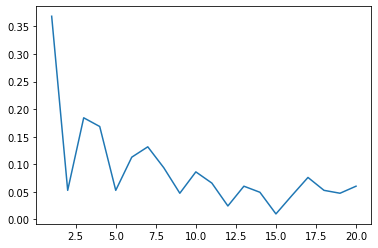

In [18]:
plt.plot(times, tvds)